# Занятие 3

###### Изучаем ML: Уменьшение размерности
######  Нормализация
###### Энкодинг
###### Работа с реальным кейсом по навыкам Пандас (Предобработка, обработка, АБС анализ)

# Уменьшение Размерности (Обобщение)


###### «Собирает конкретные признаки в абстракции более высокого уровня»



Сегодня используют для:

    Рекомендательные Системы (★)
    Красивые визуализации
    Определение тематики и поиска похожих документов
    Анализ фейковых изображений (https://vas3k.ru/blog/390/)
    Риск-менеджмент

    Популярные алгоритмы: 
        Метод главных компонент (PCA), 
        Сингулярное разложение (SVD), 
        Латентное размещение Дирихле (LDA),
        Латентно-семантический анализ (LSA, pLSA, GLSA),
        t-SNE (для визуализации)

Изначально это были методы хардкорных Data Scientist'ов, которым сгружали две фуры цифр и говорили найти там что-нибудь интересное. Когда просто строить графики в экселе уже не помогало, они придумали напрячь машины искать закономерности вместо них. Так у них появились методы, которые назвали Dimension Reduction или Feature Learning.


Для нас практическая польза их методов в том, что мы можем объединить несколько признаков в один и получить абстракцию. Например, собаки с треугольными ушами, длинными носами и большими хвостами соединяются в полезную абстракцию «овчарки». Да, мы теряем информацию о конкретных овчарках, но новая абстракция всяко полезнее этих лишних деталей. Плюс, обучение на меньшем количестве размерностей идёт сильно быстрее.

Инструмент на удивление хорошо подошел для определения тематик текстов (Topic Modelling). Мы смогли абстрагироваться от конкретных слов до уровня смыслов даже без привлечения учителя со списком категорий. Алгоритм назвали Латентно-семантический анализ (LSA), и его идея была в том, что частота появления слова в тексте зависит от его тематики: в научных статьях больше технических терминов, в новостях о политике — имён политиков. Да, мы могли бы просто взять все слова из статей и кластеризовать, как мы делали с ларьками выше, но тогда мы бы потеряли все полезные связи между словами, например, что батарейка и аккумулятор, означают одно и то же в разных документах.

Точность такой системы — полное дно, даже не пытайтесь.

Нужно как-то объединить слова и документы в один признак, чтобы не терять эти скрытые (латентные) связи. Отсюда и появилось название метода. Оказалось, что Сингулярное разложение (SVD) легко справляется с этой задачей, выявляя для нас полезные тематические кластеры из слов, которые встречаются вместе.

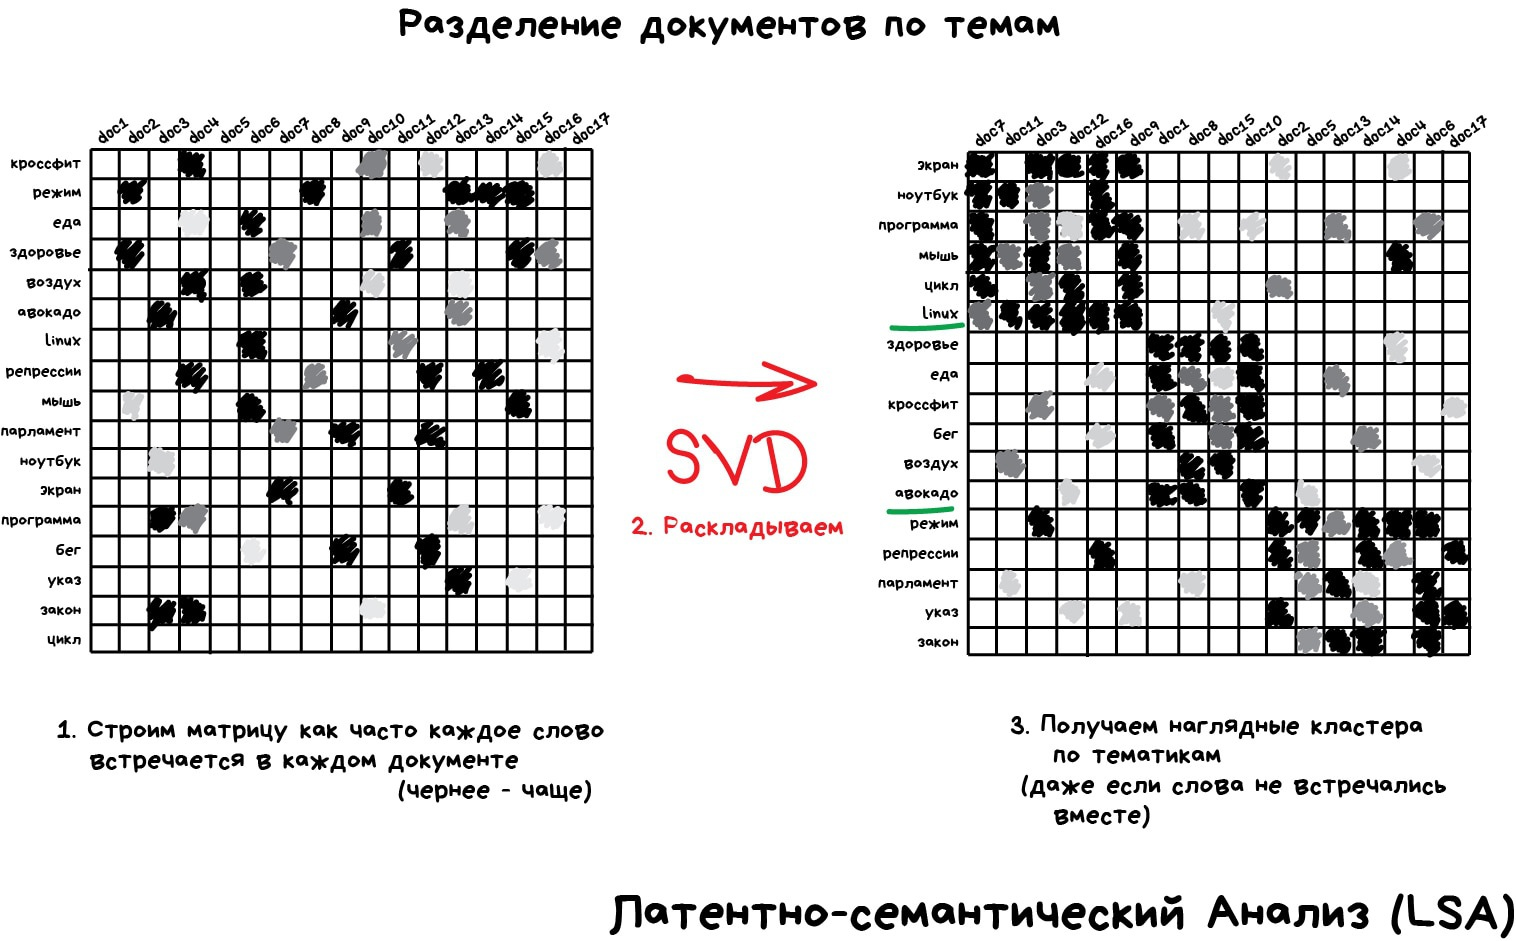

Сингуля́рное разложе́ние — определённого типа разложение прямоугольной матрицы, имеющее широкое применение, в силу своей наглядной геометрической интерпретации, при решении многих прикладных задач. Переформулировка сингулярного разложения, так называемое разложение Шмидта, имеет приложения в квантовой теории информации, например, в запутанности.

Например у нас есть матрица, состоящая из рейтингов (лайков, фактов покупки и т.п.), которые пользователи (строки матрицы) присвоили продуктам (столбцы матрицы). Давайте присмотримся к матрице image, в которой записаны известные нам рейтинги. Как правило, один пользователь не сможет оценить значительную долю продуктов, и вряд ли будет много продуктов, которые готова оценить значительная доля пользователей. Это значит, что матрица R разреженная (sparse); нельзя ли этим как-нибудь воспользоваться?



Главным инструментом для нас станет так называемое сингулярное разложение матрицы R:



Сингулярное разложение – это достаточно простой, но очень мощный инструмент. Собственно, это один из главных с практической точки зрения результатов линейной алгебры, и результат уже весьма не новый (свойства SVD были изучены самое позднее в 1930-х годах), – и тем удивительнее бывает, когда университетские курсы линейной алгебры, довольно подробные в каких-то других аспектах, совершенно обходят SVD стороной.

если R – матрица большого размера N x M, но малого ранга f (в частности, разреженные матрицы часто бывают малого ранга), её можно разложить в произведение матрицы N x f и матрицы f x M, тем самым резко сократив число параметров, c NM до (N+M)f (чтобы понять, что это большой прогресс, представьте, что, как это обычно бывает на практике, N и M измеряются сотнями тысяч и миллионами, а f меньше десятка).

SVD очень широко употребляется в машинном обучении; фактически, если вы хотите что-то чем-то приблизить, не исключено, что вам где-то по дороге встретится SVD. Классический пример применения SVD – шумоподавление, например, в изображениях.

В случае рекомендательных систем получается, что мы представляем каждого пользователя вектором из f факторов image и представляем каждый продукт вектором из f факторов image, а потом, чтобы предсказать рейтинг пользователя i товару j, берём их скалярное произведение. Можно сказать, что вектор факторов пользователя показывает, насколько пользователю нравится или не нравится тот или иной фактор, а вектор факторов продукта показывает, насколько тот или иной фактор в продукте выражен. Линейная же алгебра подсказывает нам, что для разреженной матрицы рейтингов такое разложение часто возможно и имеет содержательный смысл.

Может оказаться, кстати, что некоторые факторы легко будет понять человеческим умом: для фильмов может выделиться что-нибудь в духе «комедия–драма», «доля action'а», «доля романтики» и т.п., а факторы пользователей, соответственно, будут показывать, насколько соответствующие характеристики фильма им по вкусу. Но может и не выделиться ничего содержательного – тут гарантий нет, формально мы просто жонглируем цифрами.

###### PCA

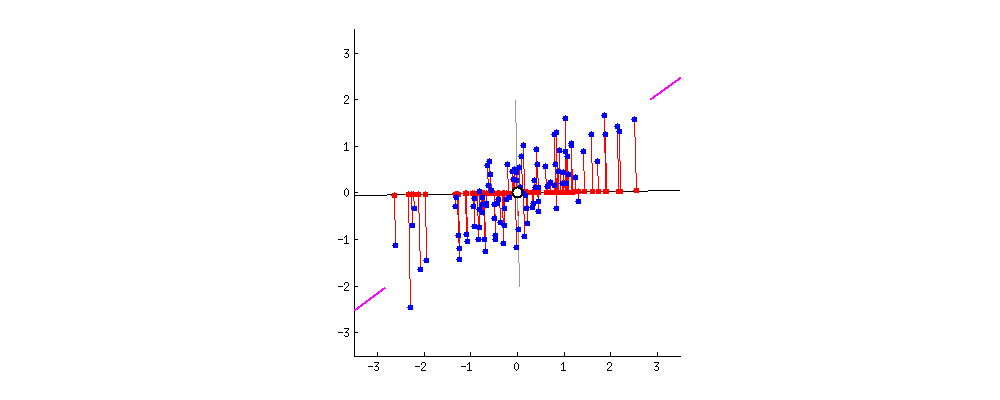

https://habr.com/ru/post/304214/

Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. Изобретён Карлом Пирсоном в 1901 году. Применяется во многих областях, в том числе в эконометрике, биоинформатике, обработке изображений, для сжатия данных, в общественных науках

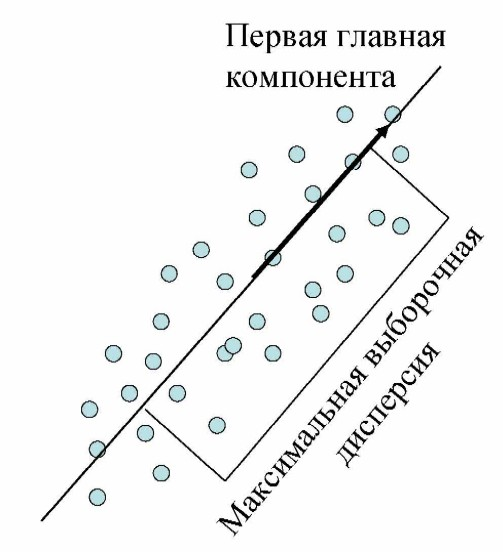

В анализе данных, как и в любом другом анализе, порой бывает нелишним создать упрощенную модель, максимально точно описывающую реальное положение дел. Часто бывает так, что признаки довольно сильно зависят друг от друга и их одновременное наличие избыточно.

К примеру, расход топлива у нас меряется в литрах на 100 км, а в США в милях на галлон. На первый взгляд, величины разные, но на самом деле они строго зависят друг от друга. В миле 1600м, а в галлоне 3.8л. Один признак строго зависит от другого, зная один, знаем и другой.

Но гораздо чаще бывает так, что признаки зависят друг от друга не так строго и (что важно!) не так явно. Объем двигателя в целом положительно влияет на разгон до 100 км/ч, но это верно не всегда. А еще может оказаться, что с учетом не видимых на первый взгляд факторов (типа улучшения качества топлива, использования более легких материалов и прочих современных достижений), год автомобиля не сильно, но тоже влияет на его разгон.

Зная зависимости и их силу, мы можем выразить несколько признаков через один, слить воедино, так сказать, и работать уже с более простой моделью. Конечно, избежать потерь информации, скорее всего не удастся, но минимизировать ее нам поможет как раз метод PCA.

данный метод аппроксимирует n-размерное облако наблюдений до эллипсоида (тоже n-мерного), полуоси которого и будут являться будущими главными компонентами. И при проекции на такие оси (снижении размерности) сохраняется наибольшее количество информации.

Ищется центр облака данных, и туда переносится новое начало координат –  это нулевая главная компонента (PC0) 
Выбирается направление максимального изменения данных – это первая главная компонента (PC1) 
Если данные описаны не полностью (шум велик), то выбирается еще одно направление (PC2) – перпендикулярное к первому, так чтобы описать оставшееся изменение в данных и т.д.

В результате, мы переходим от большого количества переменных к новому представлению, размерность которого значительно меньше. Часто удается упростить данные на порядки: от 1000 переменных перейти всего к двум. При этом ничего не выбрасывается – все переменные учитываются. В то же время несущественная для сути дела часть данных отделяется, превращается в шум. Найденные главные компоненты и дают нам искомые скрытые переменные, управляющие устройством данных.



https://rcs.chemometrics.ru/old/Tutorials/pca.htm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [32]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

<ipython-input-33-39639753e9c1>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)


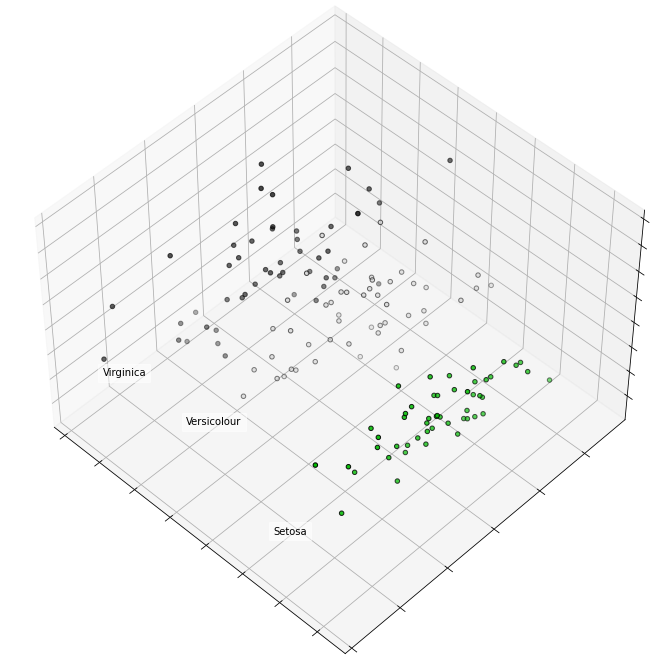

In [33]:
fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

n_components Количество компонентов, которые необходимо сохранить. если n_components не установлен, все компоненты сохраняются:



svd_solver 
Решатель выбирается политикой по умолчанию на основе X.shapeи n_components: если входные данные больше 500x500, а количество извлекаемых компонентов меньше 80% от наименьшего размера данных, то включается более эффективный «рандомизированный» метод. . В противном случае вычисляется точный полный SVD, который впоследствии может быть усечен.

В scikit-learn PCA реализован как объект-трансформер , который обучается компонентfv в своем fit методе и может использоваться для новых данных, чтобы спроецировать их на эти компоненты.

PCA центрирует, но не масштабирует входные данные для каждой функции перед применением SVD. Необязательный параметр whiten=Trueпозволяет проецировать данные на единственное пространство при масштабировании каждого компонента до единичной дисперсии. Это часто полезно, если последующие модели делают сильные предположения об изотропии сигнала: это, например, случай для машин опорных векторов с ядром RBF и алгоритмом кластеризации K-средних.

Ниже приведен пример набора данных по радужной оболочке, который состоит из 4 функций, спроецированных на 2 измерения, которые объясняют большую часть дисперсии:

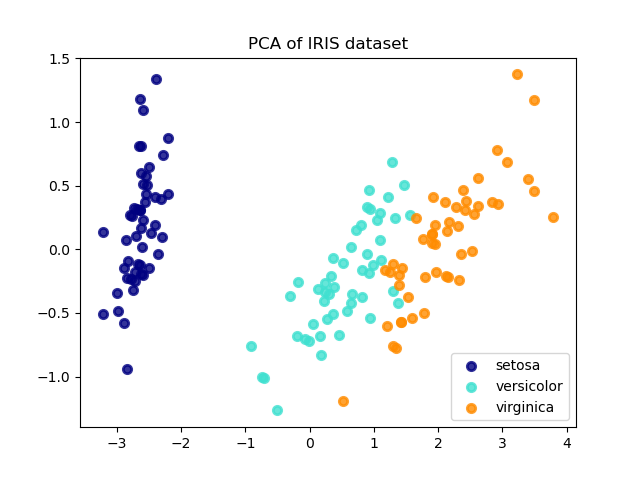

пример использования для реконструкции изображений

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb

Забавная статья про LDA

In [ ]:
https://habr.com/ru/company/surfingbird/blog/150607/

# Нормализация данных

Почему нам нужно нормализовать данные в Python?


Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.



Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.



Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.



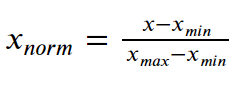

Мы вычитаем минимальное значение из каждой записи, а затем делим результат на диапазон. Где диапазон - это разница между максимальным значением и минимальным значением.



###### два разных способа нормализации данных в Python.

###### Использование normalize() из sklearn


In [37]:
from sklearn import preprocessing


In [34]:
import numpy as np
x_array = np.array([2,3,5,6,7,4,8,7,6])

In [35]:
x_array

array([2, 3, 5, 6, 7, 4, 8, 7, 6])

Теперь мы можем использовать метод normalize() для массива. Этот метод нормализует данные по строке. Давайте посмотрим на метод в действии.



In [38]:
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.11785113 0.1767767  0.29462783 0.35355339 0.41247896 0.23570226
  0.47140452 0.41247896 0.35355339]]


Мы видим, что все значения теперь находятся в диапазоне от 0 до 1. Так работает метод normalize() в sklearn.



Поскольку normalize() нормализует только значения по строкам, нам нужно преобразовать столбец в массив, прежде чем применять метод.

In [47]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [59]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [62]:

x_array = np.array(df['sepal width (cm)'])
normalized_arr = preprocessing.normalize([x_array])

print(normalized_arr)

[[0.09254209 0.07932179 0.08460991 0.08196585 0.09518615 0.10311833
  0.08989803 0.08989803 0.07667773 0.08196585 0.09783021 0.08989803
  0.07932179 0.07932179 0.10576239 0.11633862 0.10311833 0.09254209
  0.10047427 0.10047427 0.08989803 0.09783021 0.09518615 0.08725397
  0.08989803 0.07932179 0.08989803 0.09254209 0.08989803 0.08460991
  0.08196585 0.08989803 0.10840645 0.11105051 0.08196585 0.08460991
  0.09254209 0.09518615 0.07932179 0.08989803 0.09254209 0.06081337
  0.08460991 0.09254209 0.10047427 0.07932179 0.10047427 0.08460991
  0.09783021 0.08725397 0.08460991 0.08460991 0.08196585 0.06081337
  0.07403367 0.07403367 0.08725397 0.06345743 0.07667773 0.07138961
  0.05288119 0.07932179 0.05816931 0.07667773 0.07667773 0.08196585
  0.07932179 0.07138961 0.05816931 0.06610149 0.08460991 0.07403367
  0.06610149 0.07403367 0.07667773 0.07932179 0.07403367 0.07932179
  0.07667773 0.06874555 0.06345743 0.06345743 0.07138961 0.07138961
  0.07932179 0.08989803 0.08196585 0.06081337 0.

Как нормализовать набор данных без преобразования столбцов в массив?


Давайте посмотрим, что произойдет, когда мы попытаемся нормализовать набор данных без преобразования функций в массивы для обработки.



In [64]:
d = preprocessing.normalize(df)



ValueError: could not convert string to float: 'setosa'

In [65]:
d = preprocessing.normalize(df.loc[:, df.columns !='species'])


In [66]:
d

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 , 0.        ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134, 0.        ],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949, 0.        ],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392, 0.        ],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 , 0.        ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704, 0.        ],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 , 0.        ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 , 0.        ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562, 0.        ],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451, 0.        ],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797, 0.        ],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129, 0.        ],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734, 0.        ],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308, 0.        ],
       [0.81120865, 0.55945424, 0.

In [67]:
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

NameError: name 'names' is not defined

In [70]:
columns= iris['feature_names'] + ['target']
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.803773,0.551609,0.220644,0.031521,0.0
1,0.828133,0.507020,0.236609,0.033801,0.0
2,0.805333,0.548312,0.222752,0.034269,0.0
3,0.800030,0.539151,0.260879,0.034784,0.0
4,0.790965,0.569495,0.221470,0.031639,0.0


In [ ]:
Здесь значения нормализованы по строкам, что может быть очень неинтуитивно. Нормализация по строкам означает, что нормализуется каждая отдельная выборка, а не признаки.

Однако вы можете указать ось при вызове метода для нормализации по элементу (столбцу).

Значение параметра оси по умолчанию установлено на 1. Если мы изменим значение на 0, процесс нормализации произойдет по столбцу.

In [ ]:
Здесь значения нормализованы по строкам, что может быть очень неинтуитивно. Нормализация по строкам означает, что нормализуется каждая отдельная выборка, а не признаки.

Однако вы можете указать ось при вызове метода для нормализации по элементу (столбцу).

Значение параметра оси по умолчанию установлено на 1. Если мы изменим значение на 0, процесс нормализации произойдет по столбцу.

In [71]:
d = preprocessing.normalize(df.loc[:, df.columns !='species'], axis=0)


In [72]:
columns= iris['feature_names'] + ['target']
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.070563,0.092542,0.027548,0.011502,0.0
1,0.067795,0.079322,0.027548,0.011502,0.0
2,0.065028,0.084610,0.025580,0.011502,0.0
3,0.063645,0.081966,0.029516,0.011502,0.0
4,0.069179,0.095186,0.027548,0.011502,0.0


###### Вариант 2 Использование MinMaxScaler() для нормализации данных в Python


Когда дело доходит до нормализации данных, Sklearn предоставляет еще один вариант: MinMaxScaler.



Это более популярный выбор для нормализации наборов данных.



Вот код для нормализации набора данных жилья с помощью MinMaxScaler:



In [75]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [88]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()


In [89]:
names = columns= iris['feature_names'] + ['target']
d = scaler.fit_transform(df.loc[:, df.columns !='species'])

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [90]:
scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,0.500000
std,0.230018,0.181611,0.299203,0.317599,0.409616
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.500000
75%,0.583333,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Значения на выходе находятся между (0 и 1).

MinMaxScaler также дает вам возможность выбрать диапазон функций. По умолчанию диапазон установлен на (0,1). Посмотрим, как изменить диапазон на (0,2).



In [80]:

scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))

In [81]:
names = columns= iris['feature_names'] + ['target']
d = scaler.fit_transform(df.loc[:, df.columns !='species'])

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.444444,1.250000,0.135593,0.083333,0.0
1,0.333333,0.833333,0.135593,0.083333,0.0
2,0.222222,1.000000,0.101695,0.083333,0.0
3,0.166667,0.916667,0.169492,0.083333,0.0
4,0.388889,1.333333,0.135593,0.083333,0.0


Значения на выходе теперь находятся в диапазоне (0,2).


In [85]:
scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.857407,0.881111,0.934915,0.916111,1.000000
std,0.460037,0.363222,0.598406,0.635198,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.444444,0.666667,0.203390,0.166667,0.000000
50%,0.833333,0.833333,1.135593,1.000000,1.000000
75%,1.166667,1.083333,1.389831,1.416667,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000


https://pythonist.ru/normalizacziya-dannyh-v-python/

https://www.machinelearningmastery.ru/normalize-standardize-time-series-data-python/

# LabelEncoder

Он кодирует целевые метки со значением от 0 до n_classes-1.

Этот преобразователь следует использовать для кодирования целевых значений,

In [91]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [92]:
le.fit([1, 2, 2, 6])

LabelEncoder()

In [94]:
le.classes_

array([1, 2, 6])

In [95]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [96]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

Можно кодировать и текстовые метки

In [104]:
le = preprocessing.LabelEncoder()
le.fit(["Инмин", "Экотех", "Горный", "Инмин"])



LabelEncoder()

In [105]:
list(le.classes_)


['Горный', 'Инмин', 'Экотех']

In [108]:
le.transform(["Инмин", "Инмин", "Горный"])


array([1, 1, 0])

In [109]:
list(le.inverse_transform([2, 2, 1]))

['Экотех', 'Экотех', 'Инмин']

Давайте сделаем пример на наших "любимых" ирисах

In [150]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [170]:
df.species=le.fit_transform(df.species)

In [171]:
df.species.unique()

array([0, 1, 2])

In [166]:
df.species=le.inverse_transform(df.species)

In [173]:
df.species.unique()

array([0, 1, 2])

шутки ради

In [174]:
le = preprocessing.LabelEncoder()

In [175]:
le.fit(["Инмин", "Экотех", "Горный", "Инмин"])


LabelEncoder()

In [176]:
df.species=le.inverse_transform(df.species)

In [177]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,Горный
1,4.9,3.0,1.4,0.2,0.0,Горный
2,4.7,3.2,1.3,0.2,0.0,Горный
3,4.6,3.1,1.5,0.2,0.0,Горный
4,5.0,3.6,1.4,0.2,0.0,Горный
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,Экотех
146,6.3,2.5,5.0,1.9,2.0,Экотех
147,6.5,3.0,5.2,2.0,2.0,Экотех
148,6.2,3.4,5.4,2.3,2.0,Экотех


еще есть OneHotEncoder

Этот кодировщик берёт столбец с категориальными данными, который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще. 



https://habr.com/ru/post/456294/

In [143]:
iris= datasets.load_iris()
X = iris.data
Y = iris.target

In [144]:
onehot_encoder=OneHotEncoder(sparse=False)
reshaped=Y.reshape(len(Y), 1)
y_onehot=onehot_encoder.fit_transform(reshaped)

In [148]:
print(y_onehot[1:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
Y

In [ ]:
reshaped

###### P.S. функция reshape()

используется для изменения формы любого существующего массива без изменения данных, которые в нем находятся.

Форма определяется общим количеством элементов в каждом измерении. С помощью функции reshape() можно добавлять или удалять измерения в массиве, а также изменять количество элементов в каждом измерении. Например, можно преобразовать одномерный массив в многомерный (но не наоборот!).

https://pythonist.ru/kak-ispolzovat-funkcziyu-reshape-biblioteki-numpy-v-python/

# Практический кейс на Pandas. Часть 1

In [180]:
df = pd.read_excel('/mnt/c/ds/DataSet_w_NA.xlsx', sheet_name="Испорченные факты")

In [181]:
df.head()

,Номер заказа,Возврат,Дата заказа,Дата отправки,Режим отправки,Факты.Контрагент ID,Факты.Товар ID,"Продажи, руб","Продажи, шт",Скидка,Маржинальная прибыль,Повторение заказа,Повторение контрагента,Повторение товара
0,2014-100279,Нет,2015-09-10 00:00:00,2015-09-14 00:00:00,Стандарт,CLNT0000422,PROD0000870,11190.0,2.0,0.0,5371.20,1,7,3
1,2014-100293,Нет,2015-09-14 00:00:00,2015-09-18 00:00:00,Стандарт,CLNT0000784,PROD0000646,45528.0,6.0,0.2,15934.80,1,4,8
2,2014-100328,Нет,2015-07-28 00:00:00,2015-08-03 00:00:00,Стандарт,CLNT0000342,PROD0000187,1964.0,1.0,0.2,662.85,1,4,12
3,2014-100363,Нет,2015-10-08 00:00:00,2015-10-15 00:00:00,Стандарт,CLNT0000146,PROD0001095,1184.0,2.0,0.2,414.40,2,12,7
4,2014-100363,Нет,2015-10-08 00:00:00,2015-10-15 00:00:00,Стандарт,CLNT0000146,PROD0001616,9504.0,3.0,0.2,3445.20,2,12,3


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10293 entries, 0 to 10292
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Номер заказа            10293 non-null  object 
 1   Возврат                 10293 non-null  object 
 2   Дата заказа             10293 non-null  object 
 3   Дата отправки           10293 non-null  object 
 4   Режим отправки          10293 non-null  object 
 5   Факты.Контрагент ID     10203 non-null  object 
 6   Факты.Товар ID          10242 non-null  object 
 7   Продажи, руб            10098 non-null  float64
 8   Продажи, шт             10272 non-null  float64
 9   Скидка                  10293 non-null  float64
 10  Маржинальная прибыль    10275 non-null  float64
 11  Повторение заказа       10293 non-null  int64  
 12  Повторение контрагента  10293 non-null  int64  
 13  Повторение товара       10293 non-null  int64  
dtypes: float64(4), int64(3), object(7)
mem

In [184]:
df.isnull().values.any()

True

In [185]:
df.isnull().any()

Номер заказа              False
Возврат                   False
Дата заказа               False
Дата отправки             False
Режим отправки            False
Факты.Контрагент ID        True
Факты.Товар ID             True
Продажи, руб               True
Продажи, шт                True
Скидка                    False
Маржинальная прибыль       True
Повторение заказа         False
Повторение контрагента    False
Повторение товара         False
dtype: bool

In [186]:
df.isna().sum()

Номер заказа                0
Возврат                     0
Дата заказа                 0
Дата отправки               0
Режим отправки              0
Факты.Контрагент ID        90
Факты.Товар ID             51
Продажи, руб              195
Продажи, шт                21
Скидка                      0
Маржинальная прибыль       18
Повторение заказа           0
Повторение контрагента      0
Повторение товара           0
dtype: int64

In [187]:
df.isna().sum().sum()

375

In [188]:
df = df.dropna()

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 10292
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Номер заказа            9993 non-null   object 
 1   Возврат                 9993 non-null   object 
 2   Дата заказа             9993 non-null   object 
 3   Дата отправки           9993 non-null   object 
 4   Режим отправки          9993 non-null   object 
 5   Факты.Контрагент ID     9993 non-null   object 
 6   Факты.Товар ID          9993 non-null   object 
 7   Продажи, руб            9993 non-null   float64
 8   Продажи, шт             9993 non-null   float64
 9   Скидка                  9993 non-null   float64
 10  Маржинальная прибыль    9993 non-null   float64
 11  Повторение заказа       9993 non-null   int64  
 12  Повторение контрагента  9993 non-null   int64  
 13  Повторение товара       9993 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memo

In [190]:
piv_df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [191]:
piv_df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [194]:
table = pd.pivot_table(piv_df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)

In [195]:
table

C        large  small
A   B                
bar one    4.0    5.0
    two    7.0    6.0
foo one    4.0    1.0
    two    NaN    6.0

In [196]:
table = pd.pivot_table(piv_df, values='D', index=['B', 'A'], columns=['C'], aggfunc=np.sum)

In [197]:
table

C        large  small
B   A                
one bar    4.0    5.0
    foo    4.0    1.0
two bar    7.0    6.0
    foo    NaN    6.0

In [199]:
table = pd.pivot_table(piv_df, values=['D', 'E'], index=['A', 'C'],aggfunc={'D': np.mean, 'E': np.mean})

In [200]:
table

D         E
A   C                        
bar large  5.500000  7.500000
    small  5.500000  8.500000
foo large  2.000000  4.500000
    small  2.333333  4.333333

In [201]:
table = pd.pivot_table(piv_df, values=['D', 'E'], index=['A', 'C'],aggfunc={'D': np.mean,'E': [min, max, np.mean]})

In [ ]:
table

In [204]:
df =pd.pivot_table(df, values=['Продажи, руб', 'Продажи, шт','Повторение заказа','Маржинальная прибыль','Повторение товара'], index=["Факты.Товар ID"],
                     aggfunc={'Продажи, шт': [np.median, np.sum],
                              'Продажи, руб': np.sum,
                              'Повторение заказа': np.sum,
                              'Маржинальная прибыль': np.sum
                        
                               })

In [205]:
df.head()

Маржинальная прибыль Повторение заказа Продажи, руб  \
                                sum               sum          sum   
Факты.Товар ID                                                       
PROD0000001               -28160.70                 6     631978.5   
PROD0000002               963721.00                32    5318764.0   
PROD0000003                32200.55                18      76755.0   
PROD0000004              -266380.65                17    3621384.0   
PROD0000005                31874.40                18     150984.0   

               Продажи, шт        
                    median   sum  
Факты.Товар ID                    
PROD0000001            2.5  12.0  
PROD0000002            3.5  51.0  
PROD0000003            2.0  23.0  
PROD0000004            4.0  29.0  
PROD0000005            5.0  24.0

In [206]:
newname=df.columns.map('_'.join)

In [207]:
newname

Index(['Маржинальная прибыль_sum', 'Повторение заказа_sum', 'Продажи, руб_sum',
       'Продажи, шт_median', 'Продажи, шт_sum'],
      dtype='object')

In [208]:
df.columns=newname

In [209]:
df.head()

,Маржинальная прибыль_sum,Повторение заказа_sum,"Продажи, руб_sum","Продажи, шт_median","Продажи, шт_sum"
Факты.Товар ID,,,,,
PROD0000001,-28160.70,6,631978.5,2.5,12.0
PROD0000002,963721.00,32,5318764.0,3.5,51.0
PROD0000003,32200.55,18,76755.0,2.0,23.0
PROD0000004,-266380.65,17,3621384.0,4.0,29.0
PROD0000005,31874.40,18,150984.0,5.0,24.0


In [210]:
df=df.reset_index()

In [211]:
df.head()

,Факты.Товар ID,Маржинальная прибыль_sum,Повторение заказа_sum,"Продажи, руб_sum","Продажи, шт_median","Продажи, шт_sum"
0,PROD0000001,-28160.70,6,631978.5,2.5,12.0
1,PROD0000002,963721.00,32,5318764.0,3.5,51.0
2,PROD0000003,32200.55,18,76755.0,2.0,23.0
3,PROD0000004,-266380.65,17,3621384.0,4.0,29.0
4,PROD0000005,31874.40,18,150984.0,5.0,24.0


In [212]:
df['Продажи, шт_sum']

0       12.0
1       51.0
2       23.0
3       29.0
4       24.0
        ... 
1857     3.0
1858     3.0
1859     4.0
1860     5.0
1861     3.0
Name: Продажи, шт_sum, Length: 1862, dtype: float64

In [213]:
total_sale=df['Продажи, руб_sum'].sum()

In [214]:
df['Доля']=df['Продажи, руб_sum']/total_sale * 100

In [215]:
df['Доля'].sum()

100.0

In [216]:
df = df.sort_values(by=('Продажи, руб_sum'), ascending=False)

In [217]:
df=df.assign(sum_d=df['Доля'].cumsum())

In [218]:
df.loc[(df['sum_d'] <= 80), 'ABC'] = 'A'
df.loc[(df['sum_d'] > 80) & (df['sum_d'] <= 95), 'ABC'] = 'B'
df.loc[(df['sum_d'] > 95), 'ABC'] = 'C'


In [219]:
df

,Факты.Товар ID,Маржинальная прибыль_sum,Повторение заказа_sum,"Продажи, руб_sum","Продажи, шт_median","Продажи, шт_sum",Доля,sum_d,ABC
1388,PROD0001406,1.259996e+07,17,30799912.0,4.0,20.0,2.681845,2.681845,A
450,PROD0000454,3.876520e+06,23,13726692.0,3.0,31.0,1.195226,3.877071,A
1411,PROD0001430,-9.055392e+05,7,11319240.0,6.0,6.0,0.985602,4.862673,A
483,PROD0000488,2.328306e-10,15,10935288.0,5.0,39.0,0.952170,5.814843,A
1176,PROD0001187,1.116753e+06,33,9911739.5,3.0,37.0,0.863046,6.677889,A
...,...,...,...,...,...,...,...,...,...
1838,PROD0001871,1.578500e+03,1,3850.0,2.0,2.0,0.000335,99.999089,C
1854,PROD0001887,1.193400e+03,1,3536.0,2.0,2.0,0.000308,99.999396,C
1747,PROD0001779,1.555200e+03,3,3240.0,1.0,1.0,0.000282,99.999679,C
1675,PROD0001703,1.411200e+03,1,2880.0,2.0,2.0,0.000251,99.999929,C


###### -------------------------------------------------------------------------

In [235]:
piv_df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

In [236]:
piv_df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [243]:
import numpy as np
cut_points = [np.percentile(piv_df.D, i) for i in [50, 80, 95]]
piv_df.group = 1
for i in range(3):
    piv_df.group = piv_df.group + (piv_df.D < cut_points[i])
    print(piv_df.group)
# or <= cut_points[i]

0    2
1    2
2    2
3    1
4    1
5    1
6    1
7    1
8    1
Name: D, dtype: int64
0    3
1    3
2    3
3    2
4    2
5    2
6    2
7    1
8    1
Name: D, dtype: int64
0    4
1    4
2    4
3    3
4    3
5    3
6    3
7    2
8    1
Name: D, dtype: int64


###### --------------------------------------------------

In [220]:
df['Стоимость, руб'] = df['Продажи, руб_sum']/df['Продажи, шт_sum']

In [221]:
df['Продажи в следующем периоде']= (df['Продажи, шт_sum'] + df['Продажи, шт_median']) *df['Стоимость, руб']

In [222]:
total_sale_next=df['Продажи в следующем периоде'].sum()

In [223]:
total_sale_next

1372983059.7344332

In [224]:
df['Доля_будущая']=df['Продажи в следующем периоде']/total_sale_next * 100

In [225]:
df = df.sort_values(by=('Продажи в следующем периоде'), ascending=False)

In [226]:
df=df.assign(sum_d_next=df['Доля_будущая'].cumsum())

In [227]:
df['Доля_будущая'].sum()

100.0

In [228]:
df.loc[(df['sum_d_next'] <= 80), 'ABC_next'] = 'A'
df.loc[(df['sum_d_next'] > 80) & (df['sum_d_next'] <= 95), 'ABC_next'] = 'B'
df.loc[(df['sum_d_next'] > 95), 'ABC_next'] = 'C'


In [229]:
df.loc[(df['ABC'] != df['ABC_next']), 'Изменение класса'] = 1
df.loc[(df['ABC'] == df['ABC_next']), 'Изменение класса'] = 0


In [230]:
df['Изменение класса'].sum()

61.0

In [233]:
df.loc[(df['sum_d'] <= 80), 'class'] = '0'
df.loc[(df['sum_d'] > 80) & (df['sum_d'] <= 95), 'class'] = '1'
df.loc[(df['sum_d'] > 95), 'class'] = '2'


In [232]:
df.loc[(df['sum_d_next'] <= 80), 'class_next'] = '0'
df.loc[(df['sum_d_next'] > 80) & (df['sum_d_next'] <= 95), 'class_next'] = '1'
df.loc[(df['sum_d_next'] > 95), 'class_next'] = '2'


In [234]:
df

,Факты.Товар ID,Маржинальная прибыль_sum,Повторение заказа_sum,"Продажи, руб_sum","Продажи, шт_median","Продажи, шт_sum",Доля,sum_d,ABC,"Стоимость, руб",Продажи в следующем периоде,Доля_будущая,sum_d_next,ABC_next,Изменение класса,class_next,class
1388,PROD0001406,1.259996e+07,17,30799912.0,4.0,20.0,2.681845,2.681845,A,1.539996e+06,3.695989e+07,2.691941,2.691941,A,0.0,0,0
1411,PROD0001430,-9.055392e+05,7,11319240.0,6.0,6.0,0.985602,4.862673,A,1.886540e+06,2.263848e+07,1.648854,4.340795,A,0.0,0,0
450,PROD0000454,3.876520e+06,23,13726692.0,3.0,31.0,1.195226,3.877071,A,4.427965e+05,1.505508e+07,1.096523,5.437318,A,0.0,0,0
483,PROD0000488,2.328306e-10,15,10935288.0,5.0,39.0,0.952170,5.814843,A,2.803920e+05,1.233725e+07,0.898572,6.335891,A,0.0,0,0
1629,PROD0001657,2.047488e+06,6,9187447.5,4.0,12.0,0.799980,9.126346,A,7.656206e+05,1.224993e+07,0.892213,7.228103,A,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,PROD0001257,1.050000e+03,12,4200.0,2.5,5.0,0.000366,99.997704,C,8.400000e+02,6.300000e+03,0.000459,99.998575,C,0.0,2,2
1108,PROD0001119,2.220000e+02,13,4884.0,1.5,6.0,0.000425,99.996103,C,8.140000e+02,6.105000e+03,0.000445,99.999020,C,0.0,2,2
801,PROD0000808,1.702000e+03,2,4048.0,2.5,5.0,0.000352,99.998056,C,8.096000e+02,6.072000e+03,0.000442,99.999462,C,0.0,2,2
1675,PROD0001703,1.411200e+03,1,2880.0,2.0,2.0,0.000251,99.999929,C,1.440000e+03,5.760000e+03,0.000420,99.999882,C,0.0,2,2


# ДЗ

Используя  RandomForestClassifier и еще 2 метода МО предсказать будущий  ABC класс на основе любых фичей
